In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path=r"C:\Users\rahul\Documents\Naresh IT\Data Folder\Visadataset - Visadataset.csv"
visa_df=pd.read_csv(file_path)
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [3]:
categorical=[]
numerical=[]
cols=visa_df.dtypes.keys()
values=visa_df.dtypes.values
for i,j in zip(cols,values):
    if j == 'object':
        categorical.append(i)
    else:
        numerical.append(i)
categorical,numerical

(['case_id',
  'continent',
  'education_of_employee',
  'has_job_experience',
  'requires_job_training',
  'region_of_employment',
  'unit_of_wage',
  'full_time_position',
  'case_status'],
 ['no_of_employees', 'yr_of_estab', 'prevailing_wage'])

In [4]:
cat=visa_df.select_dtypes(include='object').columns
num=visa_df.select_dtypes(exclude='object').columns
cat,num

(Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
        'requires_job_training', 'region_of_employment', 'unit_of_wage',
        'full_time_position', 'case_status'],
       dtype='object'),
 Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object'))

In [9]:
visa_df['continent'].value_counts()

continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64

In [10]:
visa_df['case_status'].value_counts()

case_status
Certified    17018
Denied        8462
Name: count, dtype: int64

-  there are 25480 applicants are there

-  in that 25480 applicants , 17018 applicants got the visa

-  8462 did not got the visa

-  also there are 16861 applicants apply the visa from asia

-  we want to know how many from asia got certified and how many are denied

In [5]:
continent=visa_df['continent'].values
case_status=visa_df['case_status'].values
continent,case_status

(array(['Asia', 'Asia', 'Asia', ..., 'Asia', 'Asia', 'Asia'], dtype=object),
 array(['Denied', 'Certified', 'Denied', ..., 'Certified', 'Certified',
        'Certified'], dtype=object))

In [12]:
asia_certified=[]
asia_denied=[]
for i,j in zip(continent,case_status):
    if i == 'Asia' :
        if  j == "Certified":
            asia_certified.append(i)
        else:
            asia_denied.append(i)
len(asia_certified),len(asia_denied)

(11012, 5849)

In [9]:
con1=continent=='Asia'
con2=case_status=='Certified'
con3=case_status=='Denied'
con=con1 & con2
con4=con1 & con3
len(visa_df[con]),len(visa_df[con4])

(11012, 5849)

- From different continents how many people are certified

In [27]:
labels=visa_df['continent'].unique()
for i in labels:
    con1=visa_df['continent']==i
    con2=case_status=='Certified'
    con=con1 & con2
    print(f"{i}:  {len(visa_df[con])}")

Asia:  11012
Africa:  397
North America:  2037
Europe:  2957
South America:  493
Oceania:  122


In [19]:
labels=visa_df['continent'].unique()
certified=[]
denied=[]
for i in labels:
    con1=visa_df['continent']==i
    con2=visa_df['case_status']=='Certified'
    con3=visa_df['case_status']== 'Denied'
    con=con1 & con2
    con4= con1 & con3
    certified.append(len(visa_df[con]))
    denied.append(len(visa_df[con4]))
cols=sorted(visa_df['case_status'].unique())
df=pd.DataFrame(zip(certified,denied),index=labels,columns=cols)
df

,Certified,Denied
Asia,11012,5849
Africa,397,154
North America,2037,1255
Europe,2957,775
South America,493,359
Oceania,122,70


In [18]:
labels=visa_df['continent'].unique()
certified=[]
denied=[]
for i in labels:
    con1=visa_df['continent']==i
    con2=visa_df['case_status']=='Certified'
    con3=visa_df['case_status']== 'Denied'
    con=con1 & con2
    con4= con1 & con3
    certified.append(len(visa_df[con]))
    denied.append(len(visa_df[con4]))
df1=pd.DataFrame(zip(certified,denied),columns=['Certified','Denied'],index=labels)
df1

,Certified,Denied
Asia,11012,5849
Africa,397,154
North America,2037,1255
Europe,2957,775
South America,493,359
Oceania,122,70


**Cross Tab**

In [54]:
# pd.crosstab(index.columns)
col1=visa_df['continent']
col2=visa_df['case_status']
r1=pd.crosstab(col1,col2)
r1

case_status,Certified,Denied
continent,,
Africa,397,154
Asia,11012,5849
Europe,2957,775
North America,2037,1255
Oceania,122,70
South America,493,359


<Axes: xlabel='continent'>

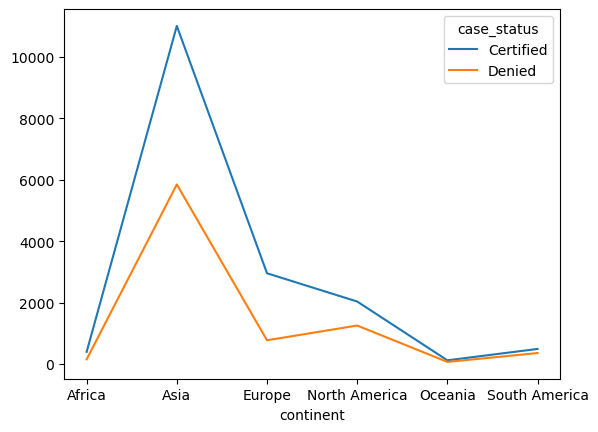

In [46]:
r1.plot()

<Axes: xlabel='continent'>

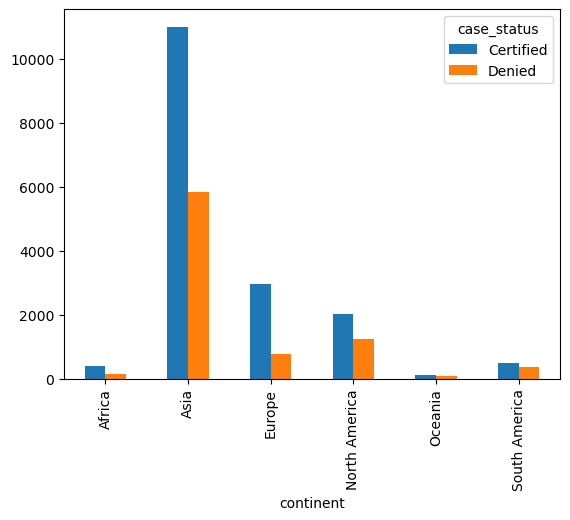

In [47]:
r1.plot(kind='bar')

**Case_status     -    Continent      -    education_of_employees**

- from asia there are 16k applicants applied for visa

- in that 11k ppl got certified

- in that 11k ppl different education applicants are available

- we want those information

In [57]:
col1=visa_df['continent']
col2=visa_df['case_status']
col3=visa_df['education_of_employee']
cols=[col1,col2]
r2=pd.crosstab(cols,col3)
r2

education_of_employee      Bachelor's  Doctorate  High School  Master's
continent     case_status                                              
Africa        Certified            81         43           23       250
              Denied               62         11           43        38
Asia          Certified          4407        780          676      5149
              Denied             2761        143         1614      1331
Europe        Certified          1040        788          162       967
              Denied              259         58          328       130
North America Certified           641        207          210       979
              Denied              584         51          191       429
Oceania       Certified            38         19           19        46
              Denied               28          3           17        22
South America Certified           160         75           74       184
              Denied              173         14           63       109

<Axes: xlabel='continent,case_status'>

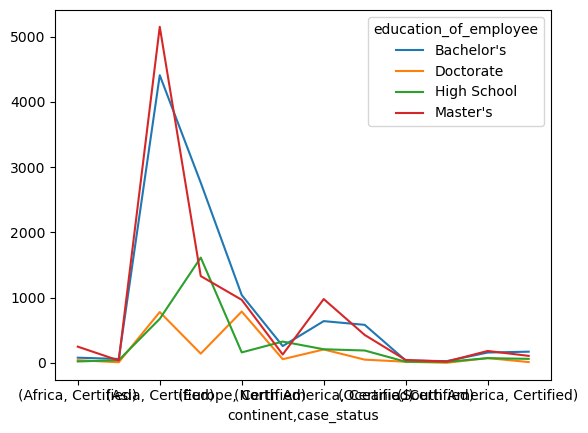

In [58]:
r2.plot()

<Axes: xlabel='continent,case_status'>

<Figure size 5000x3000 with 0 Axes>

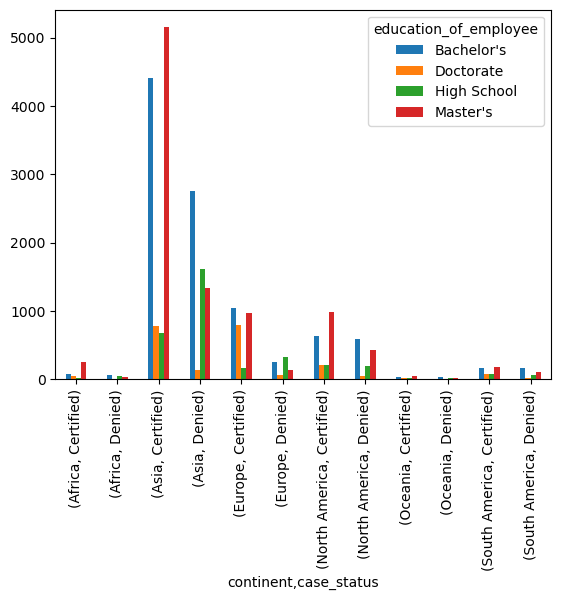

In [62]:
r2.plot(kind='bar')

**Group-By**

In [63]:
visa_df['education_of_employee'].value_counts()

education_of_employee
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: count, dtype: int64

In [64]:
visa_df['prevailing_wage']

0           592.2029
1         83425.6500
2        122996.8600
3         83434.0300
4        149907.3900
            ...     
25475     77092.5700
25476    279174.7900
25477    146298.8500
25478     86154.7700
25479     70876.9100
Name: prevailing_wage, Length: 25480, dtype: float64

In [66]:
list(visa_df.groupby(['education_of_employee']))

[(("Bachelor's",),
           case_id      continent education_of_employee has_job_experience  \
  2         EZYV03           Asia            Bachelor's                  N   
  3         EZYV04           Asia            Bachelor's                  N   
  6         EZYV07           Asia            Bachelor's                  N   
  7         EZYV08  North America            Bachelor's                  Y   
  8         EZYV09           Asia            Bachelor's                  N   
  ...          ...            ...                   ...                ...   
  25466  EZYV25467         Europe            Bachelor's                  Y   
  25468  EZYV25469           Asia            Bachelor's                  N   
  25473  EZYV25474           Asia            Bachelor's                  Y   
  25475  EZYV25476           Asia            Bachelor's                  Y   
  25479  EZYV25480           Asia            Bachelor's                  Y   
  
        requires_job_training  no_of_emplo

In [72]:
visa_df.groupby('education_of_employee').count()

,case_id,continent,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
education_of_employee,,,,,,,,,,,
Bachelor's,10234,10234,10234,10234,10234,10234,10234,10234,10234,10234,10234
Doctorate,2192,2192,2192,2192,2192,2192,2192,2192,2192,2192,2192
High School,3420,3420,3420,3420,3420,3420,3420,3420,3420,3420,3420
Master's,9634,9634,9634,9634,9634,9634,9634,9634,9634,9634,9634


In [73]:
visa_df.groupby('education_of_employee').size()

education_of_employee
Bachelor's     10234
Doctorate       2192
High School     3420
Master's        9634
dtype: int64

In [75]:
list(visa_df.groupby('education_of_employee')['prevailing_wage'])

[("Bachelor's",
  2        122996.8600
  3         83434.0300
  6         53635.3900
  7           418.2298
  8         74362.1900
              ...     
  25466      6973.4000
  25468    272715.7400
  25473     22845.5600
  25475     77092.5700
  25479     70876.9100
  Name: prevailing_wage, Length: 10234, dtype: float64),
 ('Doctorate',
  9         67514.76
  19        79948.12
  24        71286.04
  31       135866.13
  42        43630.58
             ...    
  25407     62327.54
  25426      7058.51
  25428     70380.93
  25448     86894.10
  25474     51104.78
  Name: prevailing_wage, Length: 2192, dtype: float64),
 ('High School',
  0           592.2029
  11        70813.0900
  15        74108.0200
  23        90108.3800
  27       103029.3300
              ...     
  25463    213189.3600
  25465       481.2238
  25471     75587.4200
  25472     76155.6000
  25476    279174.7900
  Name: prevailing_wage, Length: 3420, dtype: float64),
 ("Master's",
  1         83425.6500
  4      

In [20]:
visa_df[visa_df['education_of_employee']=="Bachelor's"]['prevailing_wage'].mean()

np.float64(73405.44373547)

In [79]:
visa_df.groupby('education_of_employee')['prevailing_wage'].mean()

education_of_employee
Bachelor's     73405.443735
Doctorate      64561.076657
High School    71582.147756
Master's       78843.057843
Name: prevailing_wage, dtype: float64

In [80]:
con=visa_df['case_status']=='Certified'
new_df=visa_df[con]
new_df.groupby('continent').size()

continent
Africa             397
Asia             11012
Europe            2957
North America     2037
Oceania            122
South America      493
dtype: int64

In [81]:
con=visa_df['case_status']=='Denied'
new_df=visa_df[con]
new_df.groupby('continent').size()

continent
Africa            154
Asia             5849
Europe            775
North America    1255
Oceania            70
South America     359
dtype: int64

In [83]:
con=visa_df['continent']=='Asia'
new_df=visa_df[con]
new_df['prevailing_wage'].min()

3.3188

In [6]:
visa_df.groupby('continent')['prevailing_wage'].min()

continent
Africa           32.9286
Asia              3.3188
Europe            9.1753
North America     2.1367
Oceania          24.4888
South America     3.0031
Name: prevailing_wage, dtype: float64

In [5]:
con1=visa_df['continent']=='Asia'
con2=visa_df['prevailing_wage'] >= 50000
con=con1 & con2
len(visa_df[con])

11562

- we have seen two variables continent , case_status

- we have also done three variables : continent , case_status , eduaction_of_employee

- we have also done similar analysis using groupby

-  only categorical column analysis completed

-  only numerical column analysis completed

-  Also multi-variate and Bi-variate analysis is also completed

- now we need to perfom analysis on two numerical columns

    - this will give the relation between two columns which are numerical
 
    - so we can perform correlation matrix to get the relationship
 
    - also we need to perform scatterplots to visualize       

      



**plt.scatter**

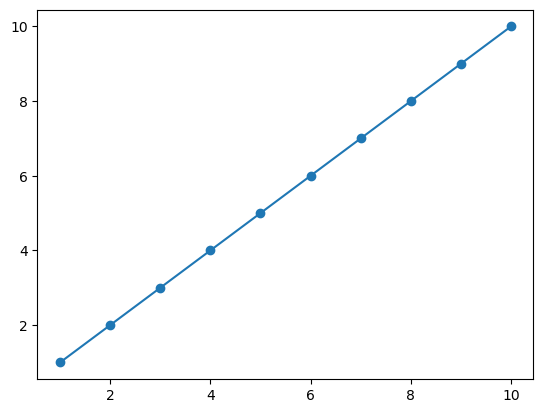

In [9]:
x=range(1,11)
y=range(1,11)
plt.scatter(x,y)
plt.plot(x,y)

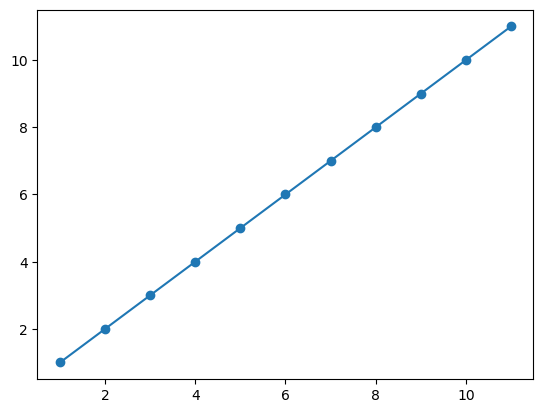

In [12]:
x=range(11,0,-1)
y=range(11,0,-1)
plt.scatter(x,y)
plt.plot(x,y)

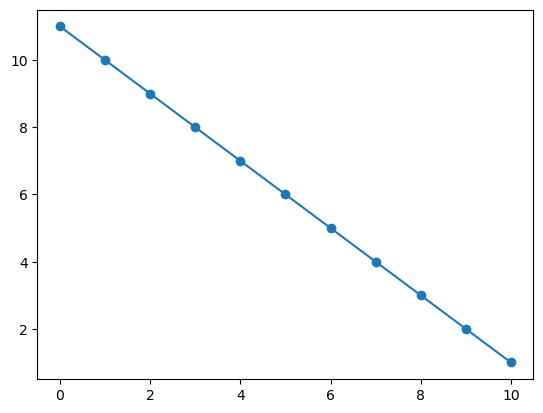

In [17]:
x=range(0,11)
y=range(11,0,-1)
plt.scatter(x,y)
plt.plot(x,y)

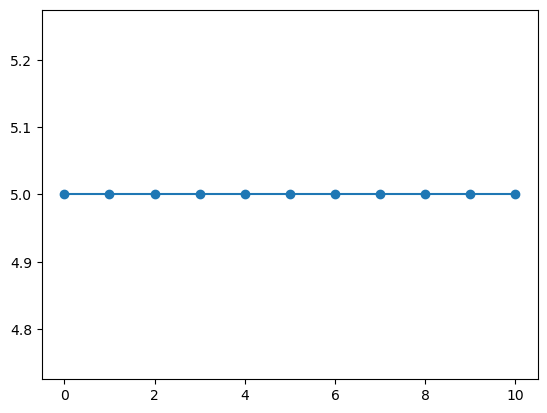

In [21]:
x=range(0,11)
y=[5 for i in range(0,11)]
plt.scatter(x,y)
plt.plot(x,y)

In [22]:
num

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

In [25]:
visa_df[num].corr()

,no_of_employees,yr_of_estab,prevailing_wage
no_of_employees,1.000000,-0.017770,-0.009523
yr_of_estab,-0.017770,1.000000,0.012342
prevailing_wage,-0.009523,0.012342,1.000000


In [52]:
visa_corr=visa_df.corr(numeric_only=True)
visa_corr

,no_of_employees,yr_of_estab,prevailing_wage
no_of_employees,1.000000,-0.017770,-0.009523
yr_of_estab,-0.017770,1.000000,0.012342
prevailing_wage,-0.009523,0.012342,1.000000


Text(0.5, 1.0, 'yr_of_estab vs prevailing_wage')

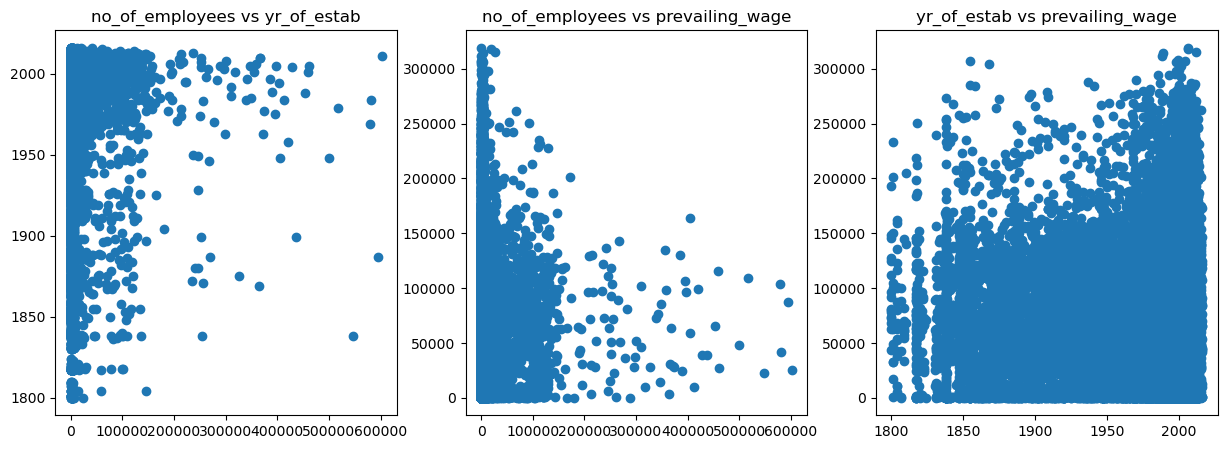

In [36]:
col1=visa_df['no_of_employees']
col2=visa_df['yr_of_estab']
col3=visa_df['prevailing_wage']
plt.figure(figsize=(15,5))
plt.subplot(1,3,1).scatter(col1,col2)
plt.title("no_of_employees vs yr_of_estab")
plt.subplot(1,3,2).scatter(col1,col3)
plt.title("no_of_employees vs prevailing_wage")
plt.subplot(1,3,3).scatter(col2,col3)
plt.title("yr_of_estab vs prevailing_wage")

In [37]:
file_path=r"C:\Users\rahul\Documents\Naresh IT\Data Folder\winequality_red - winequality_red.csv"
wine_df=pd.read_csv(file_path)
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3193,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6.0
3194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3195,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5.0
3196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
num=wine_df.select_dtypes(exclude='object').columns
cat=wine_df.select_dtypes(include='object').columns
num,cat

(Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
        'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
        'pH', 'sulphates', 'alcohol', 'quality'],
       dtype='object'),
 Index([], dtype='object'))

In [51]:
wine_corr=wine_df.corr(numeric_only=True)
wine_corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


**Heat map**

-  any matrix we visualize using heat map

-  heat map will provide colours for different values

-  heat map also provides colour bars which indicates the colours and values

-  for example the values ranges from 0.8 to 1 display as **blue-colour**

-  so we need to check values ,  we can directly see the blue colour

-  so immediately, we can sense blue colour means highest value which is between 0.8 to 1.

-  heat map is available in seaborn

-  the colour is not fixed 

<Axes: >

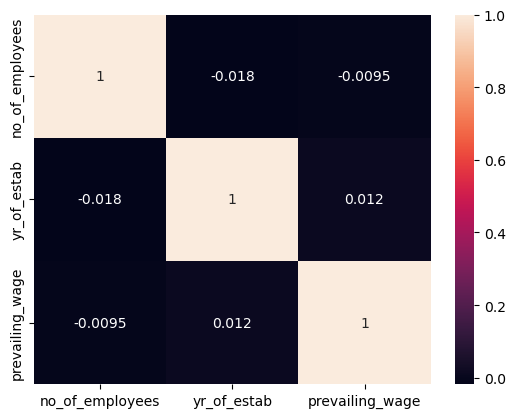

In [54]:
sns.heatmap(visa_corr,annot=True)

<Axes: >

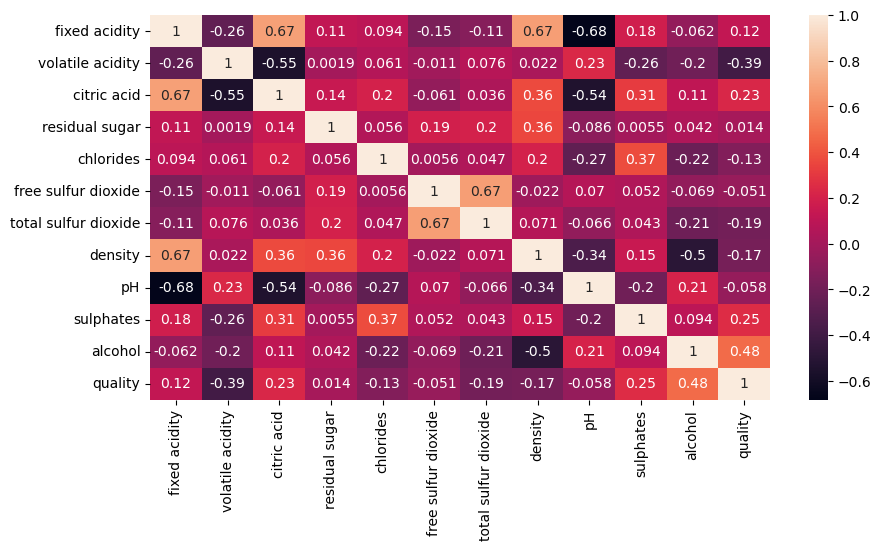

In [58]:
plt.figure(figsize=(10,5))
sns.heatmap(wine_corr,annot=True)

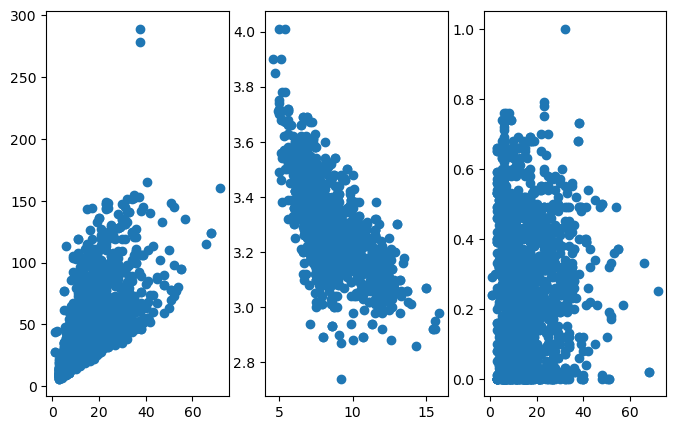

In [61]:
col1=wine_df['free sulfur dioxide']
col2=wine_df['total sulfur dioxide']
col3=wine_df['fixed acidity']
col4=wine_df['pH']
col5=wine_df['citric acid']
plt.figure(figsize=(8,5))
plt.subplot(1,3,1).scatter(col1,col2)
plt.subplot(1,3,2).scatter(col3,col4)
plt.subplot(1,3,3).scatter(col1,col5)